## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

heart_disease = fetch_ucirepo(id=45) 
  
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [6]:
heart_disease.data.features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [7]:
heart_disease.data.targets

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [8]:
df = pd.concat([X, y], axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


/var/folders/d9/3bztdgn14nqg3w4yht_b5kwc0000gn/T/ipykernel_40297/813231404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


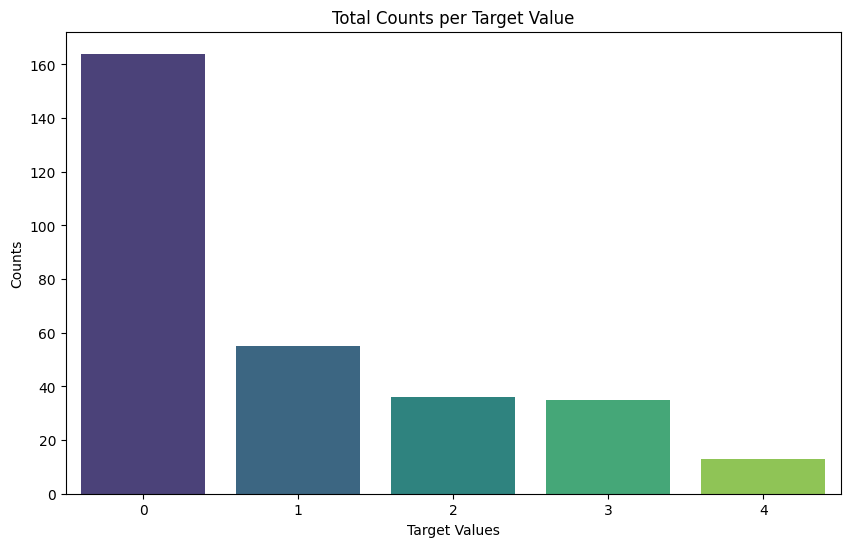

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

target_counts = df['num'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.xlabel('Target Values')
plt.ylabel('Counts')
plt.title('Total Counts per Target Value')
plt.show()

**TASK: Create a pairplot that displays the relationships between the following columns:**

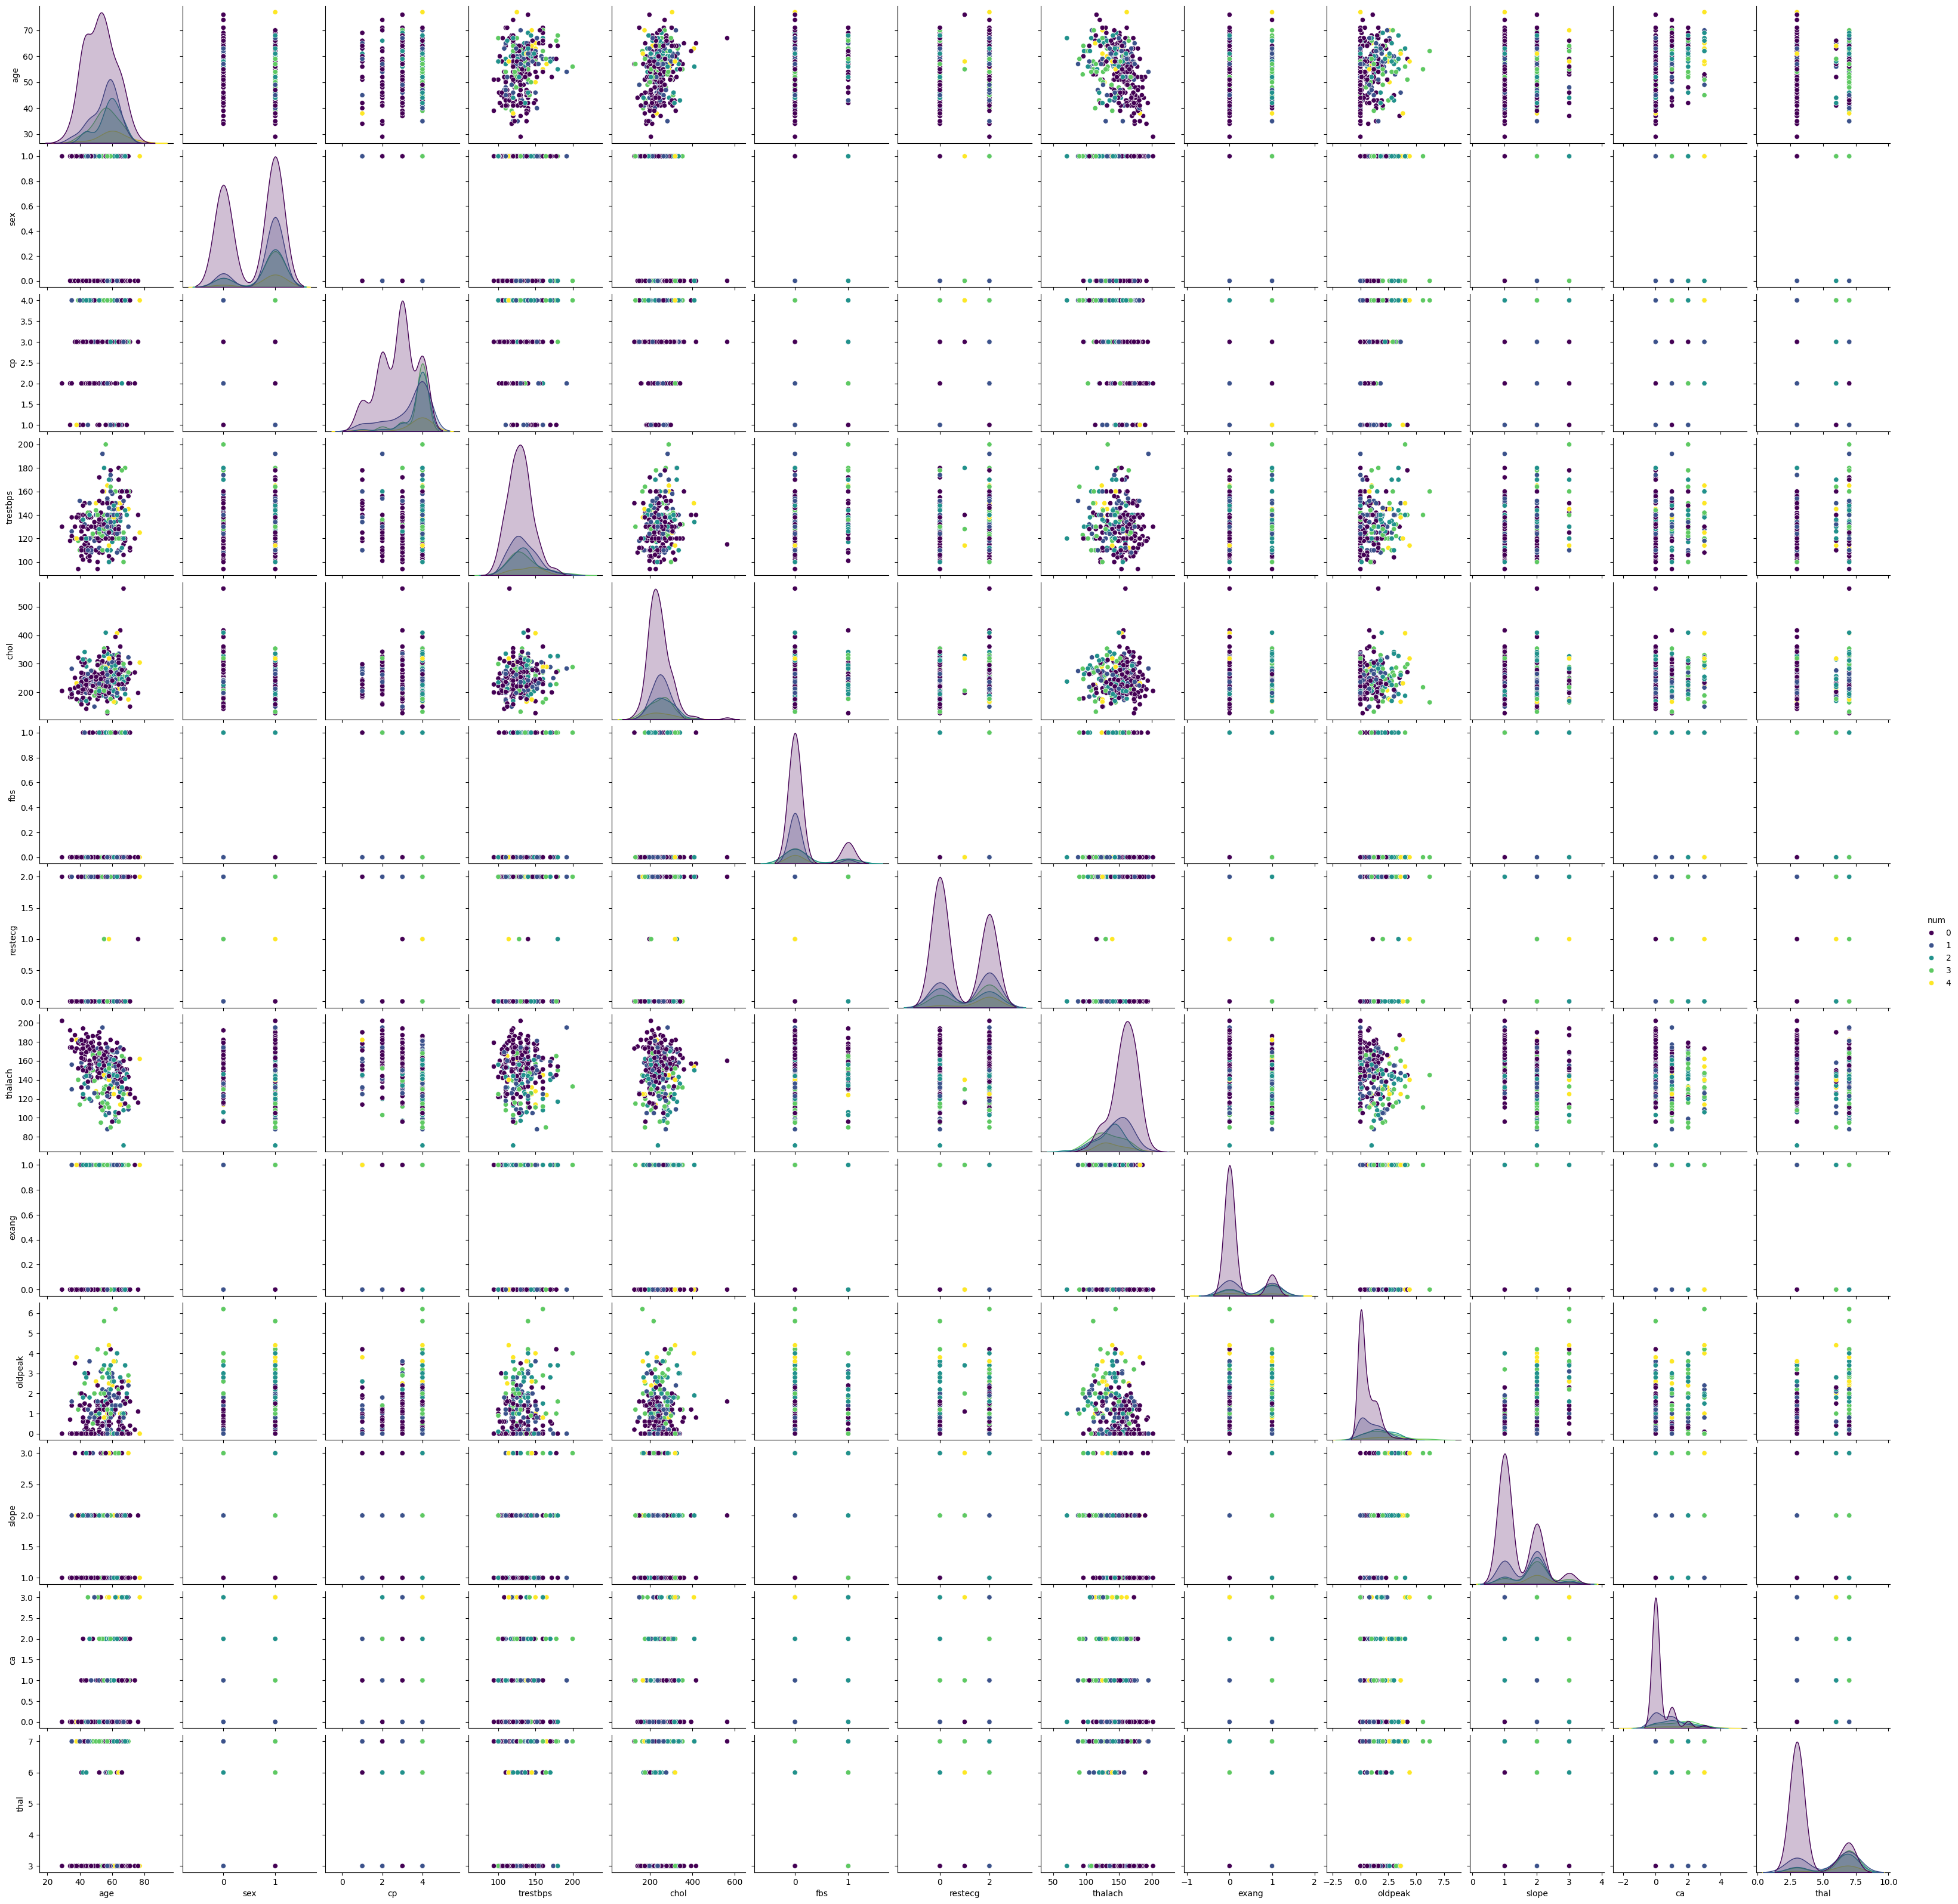

In [14]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Create the pairplot for the specified columns
sns.pairplot(df[columns], hue='num', palette='viridis')
plt.show()

**TASK: Create a heatmap that displays the correlation between all the columns.**

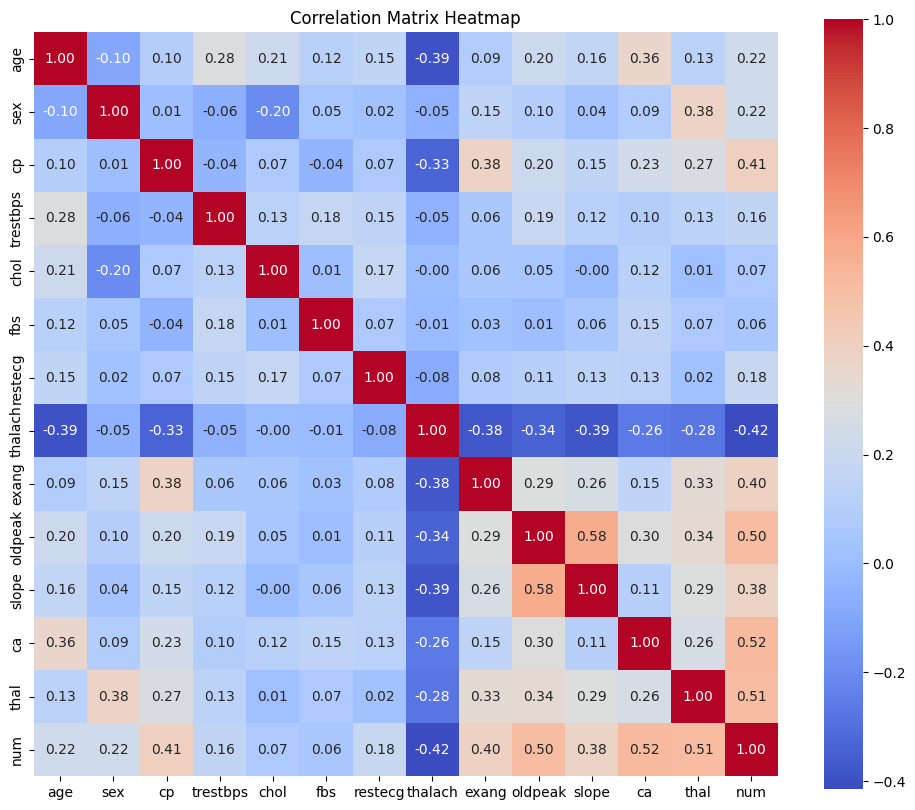

In [15]:
corr = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Modeling Task

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [16]:
y = df['num']
X = df.drop('num', axis=1)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

In [78]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [80]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(X_train_scaled)

lr_cv = LogisticRegressionCV(Cs=10, cv=5, random_state=0, max_iter=1000)

# Fit the model on the training data
lr_cv.fit(X_train_scaled_clean, y_train_clean)

best_C = lr_cv.C_[0]
print("Best C value:", best_C)

Best C value: 0.3593813663804626


**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [33]:
best_C = lr_cv.C_[0]
print("Optimal C:", best_C)

Optimal C: 0.3593813663804626


### Coeffecients

**TASK: Report back the model's coefficients.**

In [67]:
coefficients = lr_cv.coef_

for features, coefficient in zip(X.columns, coefficients[0]):
    print(f"{features} = {coefficient}")

age = 0.009594707729304567
sex = -0.3005907477300198
cp = -0.4676632245394943
trestbps = -0.2983964024967163
chol = -0.2578292907123646
fbs = 0.23784053756284523
restecg = -0.1500774484202477
thalach = 0.27382032352964164
exang = -0.3296135679046217
oldpeak = -0.4068640309331301
slope = -0.3538448286483668
ca = -0.9829579151294847
thal = -0.6983814433241006


/var/folders/d9/3bztdgn14nqg3w4yht_b5kwc0000gn/T/ipykernel_40297/3932611973.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficients', y='Features', data=df_coeffs, palette='coolwarm')


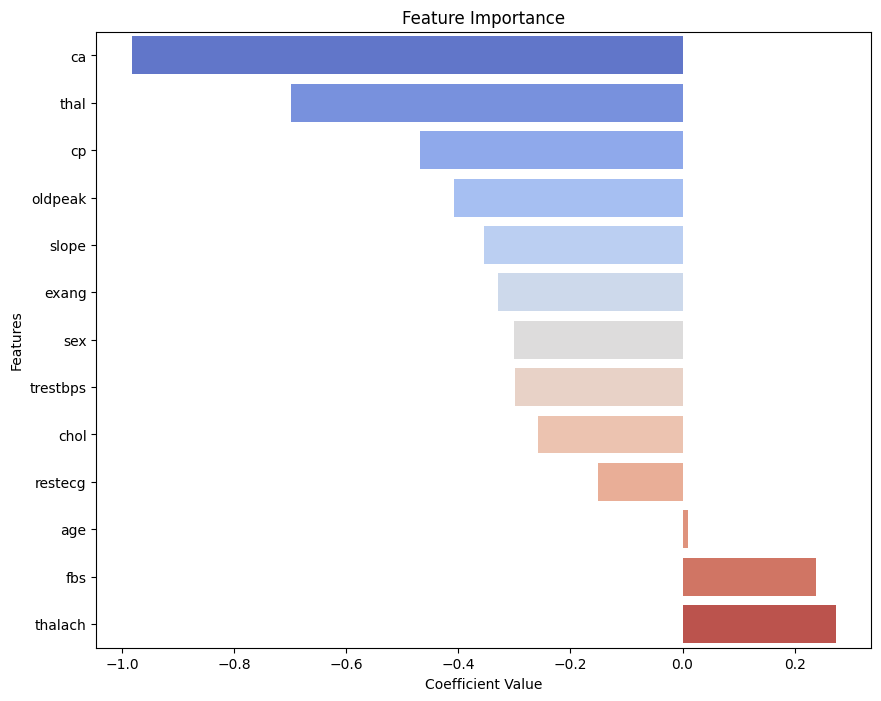

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the coefficients are already defined as shown earlier
coefficients = [0.009594707729304567, -0.3005907477300198, -0.4676632245394943, -0.2983964024967163,
                -0.2578292907123646, 0.23784053756284523, -0.1500774484202477, 0.27382032352964164,
                -0.3296135679046217, -0.4068640309331301, -0.3538448286483668, -0.9829579151294847,
                -0.6983814433241006]
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create a DataFrame for easier handling
import pandas as pd
df_coeffs = pd.DataFrame(list(zip(features, coefficients)), columns=['Features', 'Coefficients'])

# Sorting the values by coefficients to make the plot more informative
df_coeffs = df_coeffs.sort_values(by='Coefficients', ascending=True)

# Creating the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficients', y='Features', data=df_coeffs, palette='coolwarm')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


## Model Performance Evaluation
**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test data
test_score = lr_cv.score(X_test_scaled, y_test)
print("Accuracy on test data:", test_score)

# Generate predictions on the test data
y_pred = lr_cv.predict(X_test_scaled)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix Array:")
print(conf_matrix)

ValueError: Found input variables with inconsistent numbers of samples: [1, 16]

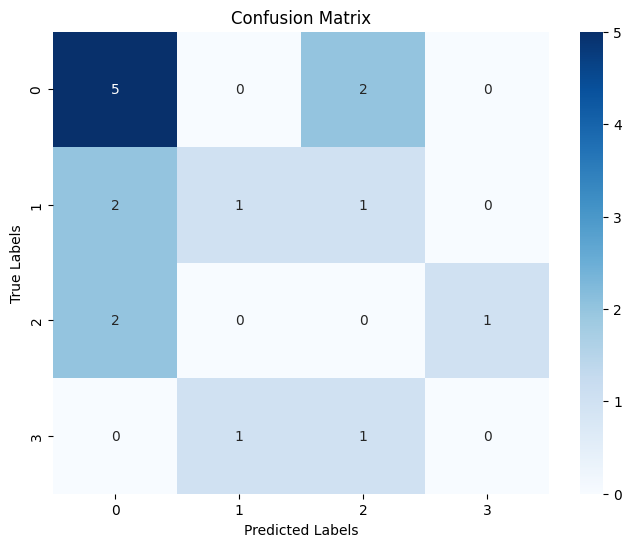

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix Data from your results
conf_matrix = np.array([[5, 0, 2, 0],
                        [2, 1, 1, 0],
                        [2, 0, 0, 1],
                        [0, 1, 1, 0]])

class_names = ['0', '1', '2', '3']  # Assuming these are your class labels

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


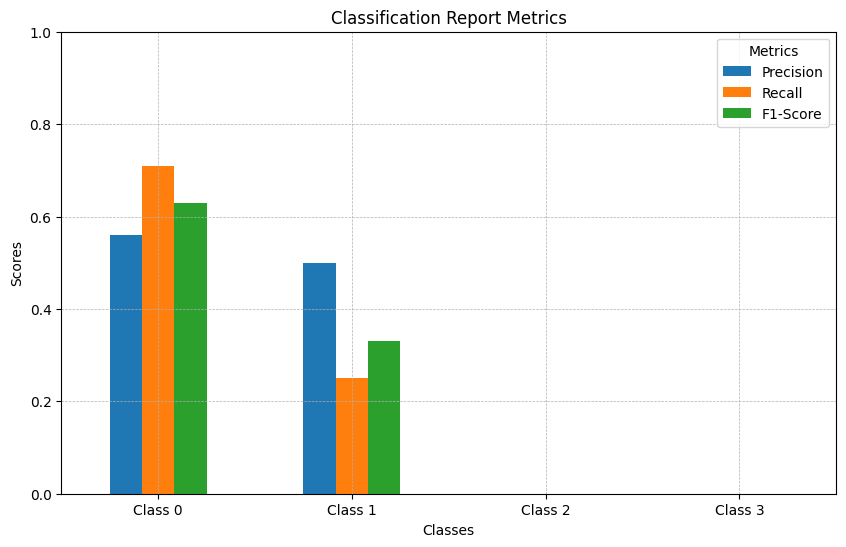

In [64]:
# Data from your Classification Report
data = {
    'Precision': [0.56, 0.50, 0.00, 0.00],
    'Recall': [0.71, 0.25, 0.00, 0.00],
    'F1-Score': [0.63, 0.33, 0.00, 0.00]
}
df_report = pd.DataFrame(data, index=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

# Plotting
df_report.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.xticks(rotation=0)  
plt.ylim(0, 1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Metrics')
plt.show()


### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


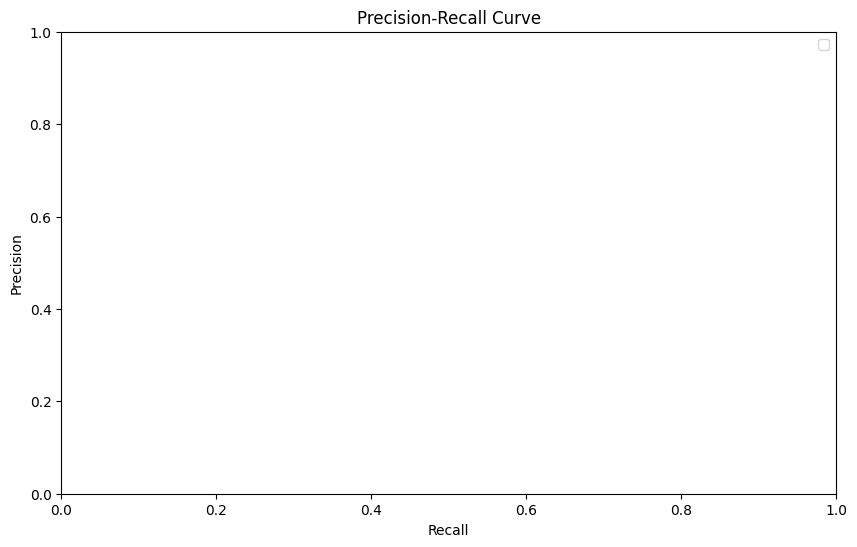

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


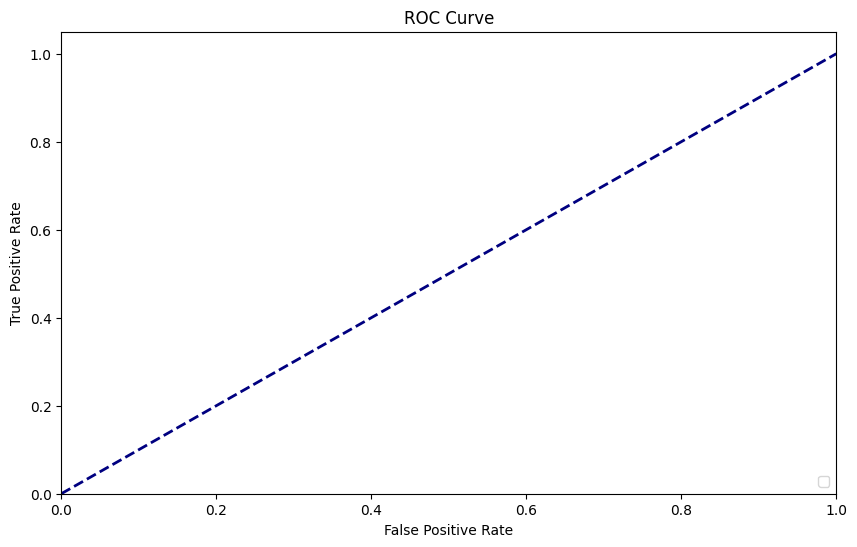

In [88]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

classes = [0, 1, 2, 3]
y_test_bin = label_binarize(y_test, classes=classes)

# Calculating Precision-Recall and ROC for each class
precision = dict()
recall = dict()
roc_auc = dict()
fpr = dict()
tpr = dict()

for i in range(len(classes)):
    if y_test_bin[:, i].sum() > 0:
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], lr_cv.predict_proba(X_test_scaled)[:, i])
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], lr_cv.predict_proba(X_test_scaled)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting Precision-Recall curve
plt.figure(figsize=(10, 6))
for i in range(len(classes)):
    if y_test_bin[:, i].sum() > 0:
        plt.plot(recall[i], precision[i], lw=2, label='Class {0} (area = {1:0.2f})'.format(i, auc(recall[i], precision[i])))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()

# Plotting ROC curve
plt.figure(figsize=(10, 6))
for i in range(len(classes)):
    if y_test_bin[:, i].sum() > 0:
        plt.plot(fpr[i], tpr[i], lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
